<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/2024_01/Turma06/LabFis4IntensidadeLuminosa_2024_1_Grupo1_turma06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV

Prática 01: Intensidade Luminosa

obj.: Verificar a relação: I = C/r^2

log (I(r)/I_max) = log(C) - 2.log(r)

y=m.x+b

y=log (I(r)/I_max); x=log (I(r)/I_max); m_t=-2 e b_t=log(C)

Dados do Exemplo: I_max=10 w/m²; I(r)=10,9,8,7,6,5,4,3,2,1; r=?




In [2]:
I_m=10

In [3]:
#Distãncia da fonte a fibra óptica
#r = [14.0,14.85,16.05,17.55,19.4,21.55,24.8,30.35,37.25,56.9] # cm - grupo 01,
#r=[1.9,2.0,2.45,2.51,3.0,3.85,4.5,5.6,7.6,12.9] # cm - grupo 02,
r = [5,7,9,11,13,15,17,19,21,23] #cm grupo 3,



In [4]:
#Intensidades Relativas:

IR =[ 1.0,0.7,0.6,0.44,0.36,0.29,0.24,0.2,0.17,0.14]

In [5]:
print(r)
N_medidas = len(r)
print ( "Número de medidas: {}".format( N_medidas ) )



[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
Número de medidas: 10


In [6]:
x = np.log10(r)
print ("x=log(r) = ", x)

x=log(r) =  [0.69897    0.84509804 0.95424251 1.04139269 1.11394335 1.17609126
 1.23044892 1.2787536  1.32221929 1.36172784]


In [7]:
y=np.log10(IR)
print ("y=log(IR) = ", y)

y=log(IR) =  [ 0.         -0.15490196 -0.22184875 -0.35654732 -0.4436975  -0.537602
 -0.61978876 -0.69897    -0.76955108 -0.85387196]


In [8]:
media_X = x.mean()
media_X2 = ( x** 2 ).mean()
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (cm): {}".format( media_X ) )
print ( "Média quadrados(cm²): {}".format( media_X2 ) )
print ( "Variância (cm²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_X_populacional ) )



Média (cm): 1.1022887503392957
Média quadrados(cm²): 1.2573669580317925
Variância (cm²): 0.042326468907226245
Desvio padrão (cm): 0.2057339760643007


In [9]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : -0.465677934001757
Média quadrados: 0.28802242282317725
Variância : 0.07116648460703251
Desvio padrão : 0.26677047176745877


In [10]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (logr × logIr): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )


Covariância (logr × logIr): -0.05440033666316779
Coeficiente de correlação: -0.9911920524491644


Coeficientes:


In [11]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (cm): {}".format( coeficiente_m ) )


Coeficiente m (cm): -1.2852557292791371


In [12]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): 0.9510449976917632


Incertezas:

In [13]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([-0.0526898 , -0.01977986,  0.05355191,  0.03086359,  0.03695958,
        0.02293103,  0.01060777, -0.00648961, -0.02120615, -0.05474846])

In [14]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )



[2.77621450e-03 3.91242860e-04 2.86780654e-03 9.52561424e-04
 1.36601046e-03 5.25832094e-04 1.12524780e-04 4.21150388e-05
 4.49700899e-04 2.99739377e-03]
Soma quadrado desvios (cm): 0.012481402359816384


In [15]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )



epsilon_y = 0.039499054355478534


In [16]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.03949905435548753


In [17]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (cm): 0.06071285821409291


In [18]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.06807877000063511


Estimativas para os coeficientes:

In [19]:
print ( "m = {:.2f} ± {:.2f} (cm)".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ) )

m = -1.29 ± 0.06 (cm)


In [20]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = 0.95 ± 0.07 (cm)


Text(0.4, 0.85, '$b = 0.95 \\pm 0.07\\,\\left(\\rm{cm}\\right)$')

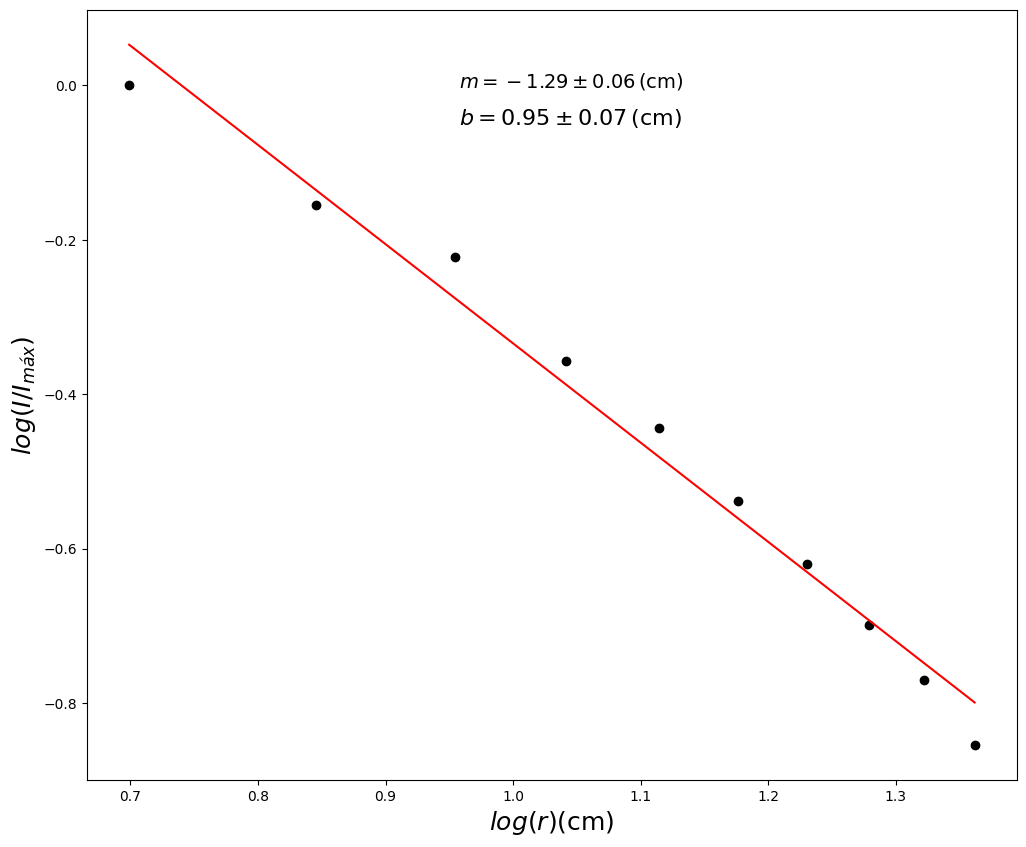

In [21]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$log(r) (\rm{cm})$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [22]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[ 0.95104499 -1.28525573] [[ 0.00463472 -0.00406309]
 [-0.00406309  0.00368605]]


In [23]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m (cm): -1.2852557263101225
Incerteza padrão coeficiente m (cm): 0.06071285774741127
a = -1.29 ± 0.06 (cm)


In [24]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): 0.9510449948653374
Incerteza padrão coeficiente b (cm): 0.06807877008826271
0.95 ± 0.07 (cm)


Text(0.4, 0.85, '$b = 0.95 \\pm 0.07\\,\\left(\\rm{cm}\\right)$')

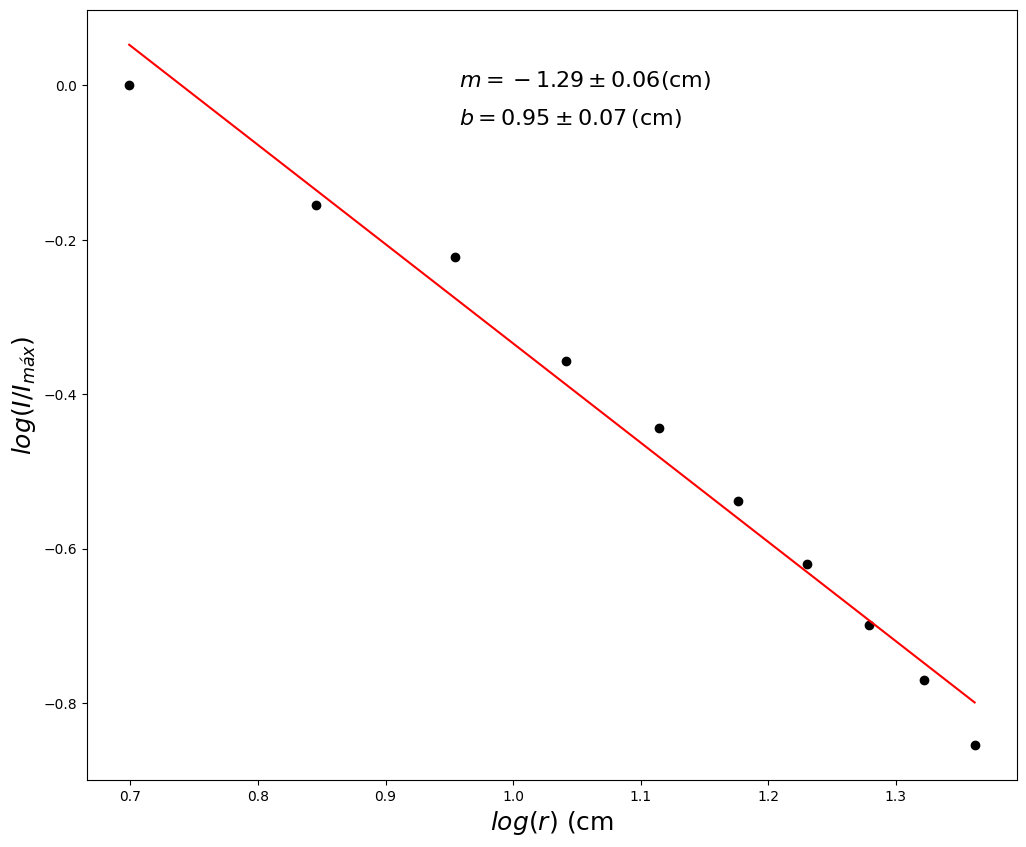

In [25]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$log(r)~(\rm{{cm}}$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}(\rm{{cm}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )